<a href="https://colab.research.google.com/github/yul77/Review/blob/main/HMLLM/%ED%9C%B4%EB%A8%BC_LLM%EC%88%98%EC%97%85_2%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 텍스트 전처리 (Text Preprocessing)

텍스트 전처리는 텍스트 데이터를 분석하고 모델에 적용하기 전에 텍스트를 정제하고 변환하는 과정입니다. 주로 자연어 처리(NLP) 프로젝트에서 텍스트 데이터를 정형화하여 머신러닝 모델이나 임베딩 모델에 적합한 형태로 만들기 위해 사용됩니다. 전처리 단계는 다음과 같은 과정을 포함합니다:

### 1. **토큰화 (Tokenization)**

- 문장을 단어 또는 서브워드로 분리하는 과정입니다. 한국어에서는 조사, 어미, 접두사, 접미사 등이 많아 이를 처리하는 토큰화가 중요합니다.
- 예시: "오늘은 날씨가 좋다" -> ["오늘", "은", "날씨", "가", "좋다"]

### 2. **불용어 제거 (Removing Stopwords)**

- 의미가 적거나 분석에 큰 도움이 되지 않는 단어(예: 조사나 빈도 높은 접속사 등)를 제거하는 과정입니다.
- 예시: "오늘은 날씨가 좋다" -> ["오늘", "날씨", "좋다"]

### 3. **소문자 변환 (Lowercasing)**

- 텍스트를 소문자로 변환하는 과정입니다. 한국어는 대소문자가 없지만, 영어 혼합 텍스트가 있을 경우 유용할 수 있습니다.

### 4. **특수 문자 제거 (Removing Special Characters)**

- 구두점, 숫자, 특수 기호를 제거하여 텍스트를 깔끔하게 만듭니다.
- 예시: "오늘은 날씨가 좋다!!!" -> "오늘은 날씨가 좋다"
>> !,? 등을 제거 한다.

### 5. **어간 추출 또는 표제어 추출 (Stemming or Lemmatization)**

- 단어의 기본 형태로 변환하는 작업입니다. 한국어에서는 주로 **형태소 분석**을 통해 수행됩니다. 어간 추출은 기본 단어의 형태를 유지하면서 접미사를 제거하는 반면, 표제어 추출은 문법적 맥락에 맞는 정확한 형태로 변환합니다.
- 예시: "먹었다" -> "먹다"
>> 형태소 분석으로 품사별로 나뉘어야 문장의 내용을 이해하기 수월하다.
>> 사과의 형태를 알려면 사과의 형태소 = '빨간' 를 알아야 한다.  

### 한국어 텍스트 전처리 예제

한국어 텍스트 전처리를 하기 위해서는 `KoNLPy`와 같은 라이브러리를 사용할 수 있습니다.

In [ ]:
# 필요한 라이브러리 설치
!pip install konlpy

from konlpy.tag import Okt  # Open Korean Text (Twitter tokenizer)

# 한국어 텍스트 예시
text = "오늘은 날씨가 정말 좋고, 기분이 좋아요! 하지만 내일은 비가 온다고 하네요."

# 1. 토큰화 (Tokenization)
okt = Okt()
tokens = okt.morphs(text)
print("토큰화:", tokens)

# 2. 불용어 제거 (Removing Stopwords)
stopwords = ['은', '가', '이', '하', '고', '내', '은', '도', '요']  # 일반적인 한국어 불용어 리스트
tokens = [word for word in tokens if word not in stopwords]
print("불용어 제거 후:", tokens)

# 3. 소문자 변환 (Lowercasing)
# 한국어는 대소문자가 없으므로 해당 단계는 생략.

# 4. 특수 문자 제거 (Removing Special Characters)
import re
clean_text = re.sub(r'[^\\w\\s]', '', text)  # \\w는 알파벳, 숫자, _를 의미, \\s는 공백
print("특수 문자 제거 후:", clean_text)

# 5. 어간 추출 또는 표제어 추출 (Stemming or Lemmatization)
# 한국어 형태소 분석을 통해 어근만 추출
lemmas = okt.morphs(text, stem=True)
print("어간 추출 후:", lemmas)

>> 위의 전처리 과정을 학습하기 전 단계 :
토큰화 -> 쓸데없는것들 제거. -> 어간추출

### 한국어 전처리 시 주의사항

- **조사 및 어미**: 한국어는 조사나 어미가 많아 단순히 토큰화만으로는 원하는 정보를 얻기 어려운 경우가 많습니다. 형태소 분석이 매우 중요합니다.
- **불용어 정의**: 한국어에서 불용어는 텍스트의 목적에 따라 다릅니다. 불용어 리스트를 상황에 맞게 조정해야 합니다.
- **형태소 분석**: 한국어는 교착어(agglutinative language)이기 때문에 형태소 분석이 필수적입니다.

>>

In [ ]:
# 영화 리뷰 전처리 예시

import re #정규 표현식 모듈
from konlpy.tag import Okt  # Open Korean Text 형태소 분석기

# 한국어 형태소 분석기 초기화
okt = Okt()

# 예시 한국어 영화 리뷰 데이터
reviews = [
    "정말 대단한 영화였습니다. 연출, 연기, 음악 모두 완벽했어요. 다음 편이 너무 기대됩니다!",
    "이 영화는 정말 실망스러웠어요. 처음부터 끝까지 스토리가 지루하고, 배우들의 연기도 별로였어요.",
    "중반까지는 조금 지루했지만 후반부의 반전은 예상치 못했습니다. 그 부분이 아주 흥미로웠어요!",
    "오랜만에 눈물을 흘리게 만든 영화였습니다. 감정선이 정말 뛰어나고, 여운이 오래 남는 영화네요.",
    "솔직히 기대 이하였습니다. 예고편 보고 기대 많이 했는데, 막상 보니 특별한 점이 없었어요.",
    "가족과 함께 즐길 수 있는 아주 따뜻한 영화였습니다. 어린이들과 함께 보기에 딱 좋습니다!",
    "액션이 너무 화려하고 시원시원했습니다. 다만 스토리가 조금 빈약한 느낌이 없지 않아 아쉽네요.",
    "배우들의 케미가 정말 좋았습니다. 특히 주인공의 감정 연기가 돋보였어요. 꼭 추천합니다!",
    "처음엔 살짝 지루했지만, 점점 빠져들었습니다. 마지막 장면은 정말 인상적이었어요!",
    "이 영화는 제 인생 영화입니다. 두 번, 세 번 다시 보고 싶을 만큼 정말 최고였어요."
]

# 불용어 정의 (일반적인 한국어 불용어)
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

# 전처리 함수 정의
def preprocess_review(review):
    # 1. 특수 문자 제거
    review = re.sub(r'[^가-힣\s]', '', review)  # 한글과 공백을 제외한 문자 모두 제거

    # 2. 토큰화 및 불용어 제거
    tokens = okt.morphs(review)  # 형태소 단위로 토큰화
    tokens = [word for word in tokens if word not in stopwords]  # 불용어 제거

    # 3. 어간 추출 (형태소 분석기를 이용해 어간 추출)
    stemmed_tokens = [okt.pos(token, stem=True) for token in tokens]

    # 결과 반환 (토큰화된 단어 리스트)
    return tokens

# 각 리뷰에 대해 전처리 수행
processed_reviews = [preprocess_review(review) for review in reviews]

# 결과 출력
for i, review in enumerate(processed_reviews):
    print(f"원본 리뷰 {i+1}: {reviews[i]}")
    print(f"전처리된 리뷰 {i+1}: {review}")
    print()

>> 과거에는 딥러닝보다는 머신러닝이 많았고 분류.회귀,군집화 알고리즘을 상용했었기 때문에 일일히 입력하는 번거로움이 있었으나 클라우드와 gpu가 성능이 좋아지면서 특히 클라우드가 언어모델 발전하는데 큰 영향을 줬다. gpu발전할 시점부터는 딥러닝이 발전하면서 무한대로 발전하기 시작했다.

>> gpt와 bert는 딥러닝에 속한다. 시계열 데이터로 진행하는건 RNN(=딥러닝).


### Embedding

**Embedding**(또는 embedding vector)이란, 텍스트를 실수 벡터 형태(i.e. floating point 숫자들로 구성된 고정된 크기의 배열)로 표현한 결과물을 의미합니다. 아래 그림에서 보여주는 바와 같이, 특정한 단어, 문장 혹은 문서를 embedding 생성 모델에 입력하게 되면, 일정한 수의 실수들로 구성된 벡터가 출력됩니다.

>> 임배딩은 텍스트를 실수로 만든다. 소수점을 쓰는 이유는 데이터가 어마어마하게 많기 때문이다. 그것들을 다 학습시키기 위해서는 실수 범위까지 활용(=숫자에서 사용할 수 있는 최대공간). 워드 임배딩 = "문자" 를 "실수 벡터"로 만든다.  

Embedding을 사람이 직접 관찰하고 그 의미를 파악하기는 어려우나, 서로 다른 단어 또는 문서로부터 추출된 embedding들 간의 거리를 계산하면 이들 간의 의미적 관계를 파악할 수 있습니다.

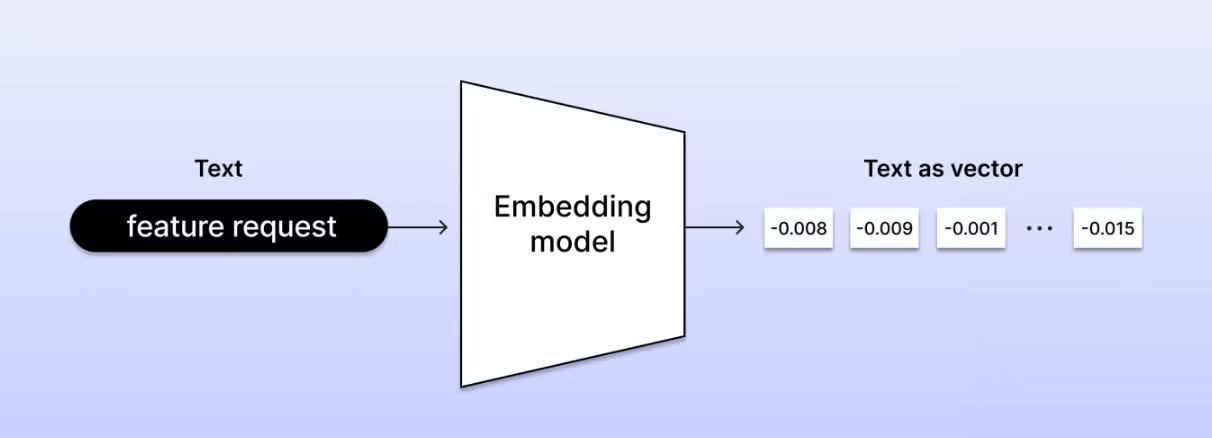

### Word2Vec

**Word2Vec**은 단어를 벡터로 변환하는 자연어 처리 모델로, 2013년 구글에서 개발한 모델입니다. 이 모델은 주어진 코퍼스(문서 집합)에서 각 단어를 고정된 크기의 벡터로 변환하며, 단어 간의 의미적 유사성을 벡터 공간에서 수치적으로 나타낼 수 있도록 설계되었습니다.

Word2Vec은 단어 간의 **의미적 관계**를 학습하여, 의미적으로 비슷한 단어들이 벡터 공간에서 가까운 위치에 매핑되도록 합니다. 예를 들어, "왕"과 "여왕"은 의미적으로 유사하기 때문에 이 두 단어의 Word2Vec 벡터는 매우 유사하게 나타납니다.

>> 단어의 의미 관계를 알기 위해 거리를 계산한다. 우먼과 맨이 서로 반대의 결과를 가져오도록 거리를 벌려둔다.
ex) 맨  1 = 아버지 1.1, 삼촌1.2, 형1.3 ....
   우먼 2 = 어머니 2.1, 이모 2.2, 언니 2.3 ...

>> 포커스로 학습시킨다 = 말뭉치.

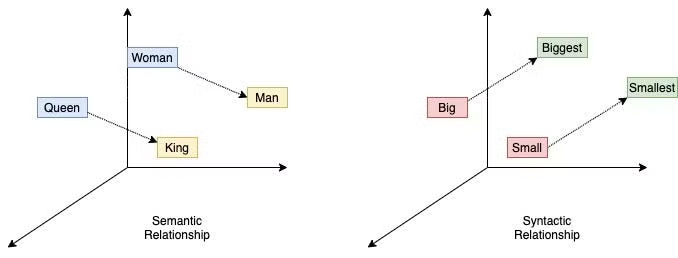



>> 공간에 표현. 벡터의 위치가 공간 상에 오고, 2차원 배열을 만들고 배열을 무한대로 올린다. 각 차원들이 IR 100~300

**One-Hot Encoding**과 **Word2Vec**는 모두 단어를 벡터로 변환하는 방법이지만, 그 방식과 특징에서 큰 차이가 있습니다. 아래에서 두 가지 방법을 다양한 측면에서 비교해 보겠습니다.

### 1. **기본 개념**

### **One-Hot Encoding**

- **정의**: One-Hot Encoding은 단어를 고유한 인덱스로 변환하여, 해당 단어의 위치에만 `1`을 표시하고 나머지는 `0`으로 채우는 벡터 표현 방식입니다.
- **특징**:
    - 모든 단어는 서로 독립적이고 고유한 벡터로 표현됩니다.
    - 벡터의 차원은 전체 단어 집합(vocabulary) 크기에 따라 결정됩니다.
    - 단어 간 **의미적 유사성**을 반영하지 않습니다.

### **Word2Vec**

- **정의**: Word2Vec은 단어를 벡터로 변환하여 의미적으로 비슷한 단어들이 벡터 공간에서 가까운 위치에 위치하도록 학습하는 밀집 벡터(dense vector) 모델입니다.
- **특징**:
    - 벡터는 학습을 통해 **의미적 관계**를 내포합니다.
    - 벡터의 차원은 사전에 설정한 고정 크기이며, 단어 집합의 크기와는 무관합니다.
    - 단어 간의 **유사성**을 반영하여 벡터 간의 수학적 연산이 가능합니다.

---

### 2. **벡터 표현 방식**

### **One-Hot Encoding**

- 각 단어는 매우 희소(sparse)한 벡터로 표현됩니다. 예를 들어, 단어 집합이 10,000개라면 각 단어는 10,000차원의 벡터에서 단 하나의 값만 `1`이고 나머지는 모두 `0`입니다.
    - 예: `['고양이', '개', '사자']` 라는 세 단어가 있으면, 벡터는 다음과 같이 표현됩니다.
        - "고양이" = `[1, 0, 0]`
        - "개" = `[0, 1, 0]`
        - "사자" = `[0, 0, 1]`
- 단어 간의 관계를 전혀 나타내지 않으며, 각 단어는 독립적입니다.

### **Word2Vec**

- Word2Vec은 단어를 밀집 벡터(dense vector)로 표현합니다. 벡터의 각 차원은 실수값으로 이루어져 있으며, 보통 100~300차원 사이의 벡터를 사용합니다.
    - 예: "고양이" = `[0.1, 0.3, 0.5, ..., 0.7]` (실수값의 벡터)
- 벡터는 학습을 통해 **단어 간의 유사성**과 **의미적 관계**를 반영합니다.
    - 예: "king" - "man" + "woman" ≈ "queen"

---

### 3. **차원 크기와 공간 효율성**

### **One-Hot Encoding**

- 차원 크기는 단어 집합의 크기와 동일합니다. 즉, 단어가 많아질수록 차원이 매우 커집니다.
    - 예: 단어 집합이 10,000개라면 벡터 차원은 10,000차원입니다.
- 대부분의 값이 `0`으로 채워지기 때문에 **희소 벡터**라고 불리며, 메모리 효율이 매우 낮습니다.

### **Word2Vec**

- Word2Vec에서 벡터의 크기는 단어 집합 크기와 무관하며, 모델 학습 시 지정된 차원 수로 고정됩니다. 보통 100~300차원 정도로 설정합니다.
    - 예: 단어 집합이 10,000개라도 벡터 차원은 100차원 또는 300차원으로 설정할 수 있습니다.
- 벡터는 밀집 벡터(dense vector)이므로 메모리 사용량이 상대적으로 적고 효율적입니다.

---

### 4. **단어 간 유사성**

### **One-Hot Encoding**

- 단어 간의 유사성을 나타내는 정보가 없습니다. 각 단어는 다른 단어와 완전히 독립적이고 고유하게 취급됩니다.
    - 예: "고양이"와 "개"는 전혀 다른 단어로, 벡터 상에서 아무런 유사성을 찾을 수 없습니다.
    - 코사인 유사도를 계산할 경우, 다른 단어들 간의 유사도는 모두 0이 됩니다.

### **Word2Vec**

- Word2Vec은 단어의 **의미적 유사성**을 반영하여 단어 간의 벡터 거리를 계산할 수 있습니다.
    - 예: "고양이"와 "개"는 의미적으로 유사하므로 두 단어의 벡터는 가까운 위치에 있게 됩니다.
    - 벡터 간 코사인 유사도를 사용해 두 단어의 유사성을 수치적으로 계산할 수 있습니다.
        - "고양이"와 "개"는 높은 유사도를 가지지만, "고양이"와 "자동차"는 낮은 유사도를 가집니다.

---

### 5. **학습과 사용 방식**

### **One-Hot Encoding**

- 학습이 필요하지 않습니다. 단어 집합에 포함된 단어에 대해 고유한 벡터를 생성하기만 하면 됩니다.
- **모델 학습 전**에 단어 벡터가 고정되므로, 의미적 관계를 반영할 수 없습니다.

### **Word2Vec**

- 학습 과정이 필요합니다. 대규모 텍스트 데이터를 기반으로 주변 단어와의 관계를 학습하여 단어 벡터를 생성합니다.
- 학습된 벡터는 이후 다양한 NLP 모델에서 **사전 학습된 임베딩**으로 사용할 수 있습니다.

---

### 6. **장점과 단점**

### **One-Hot Encoding**

- **장점**:
    - 단순하고 직관적입니다.
    - 학습이 필요 없으므로 빠르게 사용할 수 있습니다.
    - 각 단어가 고유하게 표현되기 때문에 명확한 구분을 할 수 있습니다.
- **단점**:
    - 단어 간의 **의미적 유사성**을 반영하지 못합니다.
    - 벡터가 매우 고차원이 되고, 대부분의 값이 0인 **희소 벡터**라서 메모리 효율이 낮습니다.

### **Word2Vec**

- **장점**:
    - 단어 간의 **의미적 관계**를 반영합니다.
    - 차원이 상대적으로 작고, **밀집 벡터**라 메모리 효율이 높습니다.
    - **사전 학습된 벡터**를 다양한 NLP 작업에 재사용할 수 있습니다.
- **단점**:
    - **대규모 데이터**에서 학습해야 정확한 벡터를 얻을 수 있습니다.
    - 학습이 필요한 과정이므로 시간이 더 소요될 수 있습니다.

---

### 비교

| 특징 | One-Hot Encoding | Word2Vec |
| --- | --- | --- |
| **벡터 표현** | 희소 벡터 (많은 0값 포함) | 밀집 벡터 (실수 값 포함) |
| **차원 크기** | 단어 집합 크기만큼 커짐 | 사전 설정된 고정된 차원 (예: 100~300차원) |
| **단어 간 유사성** | 없음 | 있음 (의미적으로 가까운 단어는 유사한 벡터) |
| **학습 필요성** | 학습 불필요 | 학습 필요 |
| **메모리 사용** | 비효율적 (매우 큰 차원) | 효율적 (고정된 차원의 밀집 벡터) |
| **사용 용도** | 간단한 NLP 작업 | 의미 기반 NLP 작업, 문서 분류, 유사도 분석 등 |
| **장점** | 직관적, 구현이 간단함 | 의미적 유사성 반영, 메모리 효율적 |
| **단점** | 단어 간 관계를 반영하지 않음, 희소 벡터 문제 | 대규모 데이터에서 학습 필요 |

**One-Hot Encoding**은 단어를 매우 단순하게 표현하는 방법으로, 학습이 필요 없고 간단하지만, 단어 간의 관계나 유사성을 반영하지 못해 한계가 있습니다. 반면, **Word2Vec**은 단어의 의미적 유사성을 반영하여 단어 벡터를 효율적으로 표현할 수 있으며, 자연어 처리의 다양한 작업에서 더 나은 성능을 발휘할 수 있는 방법입니다.

### Word2Vec의 기본 개념

Word2Vec은 두 가지 기본적인 알고리즘을 통해 단어의 벡터를 학습합니다:

1. **CBOW (Continuous Bag of Words)**:
    - **주변 단어로 중심 단어를 예측하는 방법**입니다. 즉, 주어진 문맥(주변 단어)을 사용하여 중심에 있는 단어를 예측합니다.
    - 예시: "나는 __ 먹고 있다"에서 빈칸에 들어갈 단어를 주변 단어("나는", "먹고", "있다")를 사용해 예측합니다.
2. **Skip-Gram**:
    - **중심 단어로 주변 단어를 예측하는 방법**입니다. 즉, 주어진 단어가 있을 때 이 단어를 바탕으로 주변에 등장할 가능성이 높은 단어들을 예측합니다.
    - 예시: "나는 밥을 먹고 있다"에서 "먹고"라는 중심 단어가 주어졌을 때, 이 단어의 주변에 있을 단어들(예: "밥을", "있다")을 예측합니다.

### Word2Vec의 벡터 표현

Word2Vec의 목표는 단어를 **고정된 크기의 벡터**로 표현하는 것입니다. 이러한 벡터는 각 단어의 의미적 특성을 수치적으로 나타내며, 벡터 간의 거리가 단어 간의 유사성을 나타냅니다. 예를 들어:

- "king" - "man" + "woman" ≈ "queen"

이 수학적 계산은 Word2Vec 벡터가 단어의 의미적 관계를 포착하고 있음을 보여줍니다. 즉, **단어 벡터는 단어의 의미적 관계를 포함**하고 있기 때문에, 단어 간의 유사성, 왕과 여왕처럼 성별 차이도 포착할 수 있습니다.

### Word2Vec 모델의 학습 과정

Word2Vec은 대규모의 텍스트 데이터를 통해 단어의 의미적 관계를 학습합니다. 학습 과정은 다음과 같습니다:

1. **단어를 벡터로 임의 초기화**합니다.
2. **주어진 데이터**에서 단어와 문맥의 관계를 기반으로 **벡터를 조정**합니다.
3. 이 과정이 반복되면서, 단어 벡터들은 의미적 유사성을 반영하도록 조정됩니다.

### Word2Vec의 특징

- **단어 간 의미적 유사성 학습**: Word2Vec은 단어가 문장에서 나타나는 문맥을 기반으로 단어 간의 유사성을 학습합니다. 의미적으로 유사한 단어들은 벡터 공간에서 가깝게 위치합니다.
- **저차원 벡터 표현**: Word2Vec은 각 단어를 고차원의 희소 벡터로 표현하는 기존의 방법과 달리, 저차원의 밀집 벡터(dense vector)로 단어를 표현합니다.
>> 차원축소에는 pca라는 것이 있다. 중복특성이 있는 데이터를 한데 모아서 쫙 모아 n차원을 1차원으로 만들 수도 있다.
- **확장성**: Word2Vec은 대규모 데이터셋에서도 효율적으로 학습할 수 있으며, 새로운 단어가 추가되더라도 모델을 확장할 수 있습니다.



### Word2Vec의 응용

Word2Vec은 자연어 처리(NLP) 분야에서 널리 사용되며, 다음과 같은 다양한 작업에서 응용됩니다:

1. **단어 유사성 계산**: Word2Vec을 사용하면 단어 간의 유사도를 쉽게 계산할 수 있습니다. 코사인 유사도(Cosine Similarity)를 사용하여 단어 벡터 간의 유사도를 측정합니다.
    - 예: "apple"과 "orange"는 유사한 단어로 계산될 수 있습니다.
    >>미리 답변을 만들어놓고 질문과 거리가 가장 짧은(유사한) 답을 고르는 것.

2. **문서 분류**: 문서 내 단어 벡터를 기반으로 문서의 주제나 내용을 분류할 수 있습니다.
>> 문서에 파일번호 등을 달아주지 않으면 유사한것이 많아 답을 찾기 어렵다.
내용기반으로 찾을 수 있게.

3. **질의 응답 시스템**: 질의 응답 시스템에서, 유사한 단어나 문장을 찾아내어 정확한 답변을 제공하는 데 사용할 수 있습니다.
4. **추천 시스템**: 사용자 리뷰나 소셜 미디어 데이터를 기반으로, 사용자가 좋아할만한 콘텐츠를 추천하는 시스템에 활용할 수 있습니다.

>> 벡터는 길이와 방향이 있다. 일반적으로 a와 b를 뺐을떄 0이 나오면 같다고 본다. 근데 벡터 공간에서는 길이와 방향이 있기 때문에 '같다' 라는 것을 증명하기위해 빼지 않는다. 같은 방향으로 가면 같은 것이다.이럴 때 코싸인 유사도를 사용한다.

### **코사인 유사도(Cosine Similarity)**

**코사인 유사도**는 두 벡터 사이의 **각도**를 기반으로 두 벡터 간의 유사성을 측정하는 방법입니다. 두 벡터 간의 각도가 작을수록 유사하다고 판단하며, 각도가 클수록 유사도가 낮다고 봅니다. 벡터가 동일한 방향을 향하고 있다면 유사도는 1, 서로 수직이라면 0, 완전히 반대 방향이라면 -1이 됩니다.

코사인 유사도는 벡터의 크기(길이)와는 관계없이 **방향성**만을 고려하기 때문에, 벡터의 크기가 달라도 유사도를 측정하는 데 효과적입니다. 이는 텍스트 데이터에서 단어 임베딩 벡터를 비교할 때 자주 사용됩니다.

>> 90도는 관계없다. 180도는 반대. 45도 이내는 관계있음.

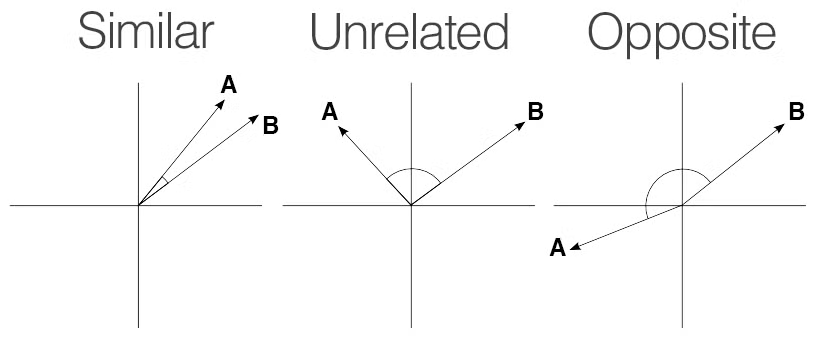

### **코사인 유사도 수식**

두 벡터 A와 B에 대한 코사인 유사도는 다음과 같이 정의됩니다:

$$

\text{Cosine Similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|}

$$
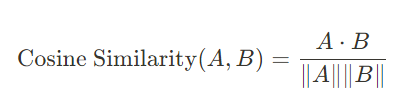

- $A \cdot B$는 두 벡터의 **내적**(dot product)입니다.
- $\|A\|$와 $\|B\|$는 각각 벡터 A와 B의 크기(노름, Euclidean norm)를 나타냅니다.
- 결과는 [-1, 1] 사이의 값으로 나타납니다.

### **수식을 단계별로 해석해보면**:

1. **내적 (dot product)**: 두 벡터의 대응되는 요소들 간의 곱을 모두 더한 값입니다.

여기서 $A_i$와 $B_i$는 벡터 A와 벡터 B의 각 요소입니다.

$$

A \cdot B = \sum_{i=1}^{n} A_i B_i

$$
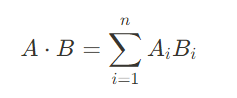
1. **벡터의 크기 (Euclidean norm)**: 각 벡터의 모든 요소의 제곱합에 제곱근을 취한 값입니다.

벡터 B도 동일한 방식으로 계산됩니다.

$$

\|A\| = \sqrt{\sum_{i=1}^{n} A_i^2}

$$
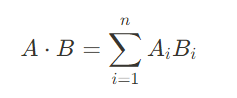
1. **최종 계산**: 위 두 결과를 바탕으로 코사인 유사도를 계산하게 됩니다.

### **코드 예제**

아래는 두 벡터 간의 코사인 유사도를 계산하는 Python 코드입니다. `numpy`와 `scikit-learn` 라이브러리를 사용하여 계산할 수 있습니다

In [ ]:
import numpy as np

# 코사인 유사도 계산 함수
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)  # 벡터의 내적
    norm_v1 = np.linalg.norm(v1)  # 벡터 v1의 크기
    norm_v2 = np.linalg.norm(v2)  # 벡터 v2의 크기
    return dot_product / (norm_v1 * norm_v2)  # 코사인 유사도 계산

# 예시 벡터
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

# 코사인 유사도 계산
similarity = cosine_similarity(v1, v2)
print(f"코사인 유사도: {similarity}")

### **코사인 유사도의 특징**

1. **크기의 무관성**: 벡터의 크기(길이)에는 영향을 받지 않고, 벡터의 방향성만 고려합니다.
    - 두 문장의 길이가 달라도 의미가 유사하다면 높은 유사도를 나타낼 수 있습니다.
2. **텍스트 유사도 측정에 자주 사용**: 벡터 공간 모델에서 문장이나 단어 임베딩의 유사도를 계산할 때 매우 유용합니다.

### **코사인 유사도의 응용**

- **문서 간 유사도** 계산: TF-IDF, Word2Vec 등으로 표현된 문서 벡터 간 유사도를 측정하는 데 사용됩니다.
- **추천 시스템**: 유사한 항목(예: 상품, 영화 등)을 추천하는 시스템에서 사용될 수 있습니다.

코사인 유사도는 텍스트, 이미지, 신호 처리 등 다양한 분야에서 벡터 간 유사성을 측정하는 데 자주 사용됩니다.

### Word2Vec 예시 (Gensim 사용)

Word2Vec을 사용하는 가장 대표적인 라이브러리는 `Gensim`입니다.

<aside>
🧑🏻‍🎓

**Gensim**은 자연어 처리(NLP) 작업에서 특히 토픽 모델링(Topic Modeling)과 단어 임베딩(Word Embedding)에 주로 사용되는 **Python 라이브러리**입니다. 주로 **대규모 텍스트 데이터**를 효율적으로 처리하고 분석할 수 있도록 설계되었습니다. Gensim의 장점은 **메모리 효율성**과 **대용량 데이터 처리**에 강점이 있다는 것입니다. 특히 **Word2Vec**, **Doc2Vec**, **FastText** 같은 임베딩 모델을 지원하는 것으로 유명합니다.

### Gensim의 주요 기능

1. **Word2Vec**:
    - **단어 임베딩(Word Embedding)** 기법 중 하나로, 단어를 고정된 크기의 벡터로 변환하는 기술입니다. 유사한 의미를 가진 단어는 벡터 공간에서 가까운 벡터로 변환됩니다.
    - Word2Vec에는 **CBOW**(Continuous Bag of Words)와 **Skip-gram** 두 가지 방식이 있습니다.
        - **CBOW**: 주변 단어들로부터 중심 단어를 예측.
        - **Skip-gram**: 중심 단어로 주변 단어를 예측.
2. **Doc2Vec**:
    - 문서 단위의 임베딩을 생성하는 모델로, **문서**나 **문장**을 벡터로 변환하여 유사한 문서끼리 가까운 벡터로 변환합니다. Word2Vec이 단어를 벡터로 변환하는 것과 달리, Doc2Vec은 문서나 문장 단위로 벡터를 생성합니다.
    >> 특히 문장단위에서 사용
</aside>
3. **FastText**:
    - 단어 자체가 아닌 **단어 내부의 문자 n-gram**을 학습하는 방식으로, 철자 기반의 임베딩을 생성합니다. 이를 통해 OOV(Out Of Vocabulary) 문제를 해결할 수 있습니다.
    - 예를 들어, "apple"과 "apples" 같은 유사 단어가 같은 벡터 공간에서 가까워지도록 학습합니다.
    
4. **LDA (Latent Dirichlet Allocation)**:
    - **토픽 모델링**을 위한 알고리즘으로, 대규모 문서에서 숨겨진 주제를 찾는 방법입니다. LDA는 문서가 다양한 주제의 혼합으로 구성된다고 가정하여 주제별로 단어 분포를 추정합니다.
5. **TF-IDF**:
    - TF-IDF (Term Frequency-Inverse Document Frequency)는 문서에서 단어의 중요도를 계산하는 방법입니다. Gensim은 이를 사용하여 텍스트 데이터를 벡터화할 수 있습니다.
6. **Similarity Queries**:
    - Gensim은 문서 간의 유사도를 계산하는 기능을 제공합니다. 텍스트 데이터의 의미적 유사성을 기반으로 문서 간의 유사도를 측정할 수 있습니다.

### 1. **Word2Vec 모델 학습**

In [ ]:
from gensim.models import Word2Vec

# 예시 문장들
sentences = [
    ["이", "영화", "정말", "재미있어요"],
    ["이", "책은", "정말", "감동적이었어요"],
    ["저는", "음악을", "좋아합니다"]
]

# Word2Vec 모델 학습
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# '영화'라는 단어의 벡터 값 출력
print(model.wv['영화'])

# '영화'와 유사한 단어 찾기
print(model.wv.most_similar('영화'))

In [ ]:
# Doc2Vec 모델 학습

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# 예시 문서들
documents = [
    TaggedDocument(words=["이", "영화", "정말", "재미있어요"], tags=["doc1"]),
    TaggedDocument(words=["이", "책은", "정말", "감동적이었어요"], tags=["doc2"]),
    TaggedDocument(words=["저는", "음악을", "좋아합니다"], tags=["doc3"])
]

# Doc2Vec 모델 학습
model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)

# 'doc1' 문서의 벡터 값 출력
print(model.dv['doc1'])

# 'doc1'과 유사한 문서 찾기
print(model.dv.most_similar('doc1'))

### Gensim의 특징

- **대규모 데이터 처리**: Gensim은 대용량 텍스트 데이터에서 단어와 문서의 벡터 표현을 학습하는 데 최적화되어 있습니다. 특히 메모리 사용을 줄이기 위해 **스트리밍 방식**으로 데이터를 처리합니다.
- **효율성**: Gensim은 메모리 효율적인 방식으로 설계되어 있으며, 한 번에 모든 데이터를 메모리에 올리지 않고 학습할 수 있습니다.
- **확장성**: Gensim은 다양한 머신러닝 모델과 통합하여 사용할 수 있으며, 다른 자연어 처리 라이브러리와도 함께 사용 가능합니다.

### Gensim 설치

In [ ]:
pip install gensim

Gensim을 사용한 간단한 Word2Vec 구현 예시는 다음과 같습니다:

In [ ]:
from gensim.models import Word2Vec

# 예시 문장들
sentences = [
    ["나는", "밥을", "먹었다"],
    ["너는", "책을", "읽었다"],
    ["그는", "음악을", "들었다"],
    ["우리는", "영화를", "보았다"]
]

# Word2Vec 모델 학습 (vector_size는 벡터의 차원, window는 주변 단어 수)
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# '밥을' 단어의 벡터 출력
print(model.wv['밥을'])

# '밥을'과 유사한 단어 찾기
print(model.wv.most_similar('밥을'))

이 예제에서는 간단한 문장 데이터를 사용하여 Word2Vec 모델을 학습시켰습니다. 학습된 모델은 단어 벡터를 생성하며, 특정 단어와 유사한 단어들을 찾을 수 있습니다

Word2Vec은 단어를 벡터로 표현하는 자연어 처리 모델로, 단어 간의 의미적 유사성을 학습하여 벡터 공간에서 이를 수치적으로 표현할 수 있습니다. 이를 통해 단어 간의 유사성을 계산하거나 문서 내 의미를 파악하는 다양한 NLP 작업에 활용할 수 있습니다.

### 영화리뷰에 대한 유사도 계산 예시

In [ ]:
!pip install konlpy
!pip install gensim scikit-learn

import re
from konlpy.tag import Okt  # Open Korean Text 형태소 분석기
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 한국어 형태소 분석기 초기화
okt = Okt()

# 예시 한국어 영화 리뷰 데이터 (다양한 표현 추가)
reviews = [
    "정말 대단한 영화였습니다. 연출, 연기, 음악 모두 완벽했어요. 다음 편이 너무 기대됩니다!",
    "이 영화는 정말 실망스러웠어요. 처음부터 끝까지 스토리가 지루하고, 배우들의 연기도 별로였어요.",
    "중반까지는 조금 지루했지만 후반부의 반전은 예상치 못했습니다. 그 부분이 아주 흥미로웠어요!",
    "오랜만에 눈물을 흘리게 만든 영화였습니다. 감정선이 정말 뛰어나고, 여운이 오래 남는 영화네요.",
    "솔직히 기대 이하였습니다. 예고편 보고 기대 많이 했는데, 막상 보니 특별한 점이 없었어요.",
    "가족과 함께 즐길 수 있는 아주 따뜻한 영화였습니다. 어린이들과 함께 보기에 딱 좋습니다!",
    "액션이 너무 화려하고 시원시원했습니다. 다만 스토리가 조금 빈약한 느낌이 없지 않아 아쉽네요.",
    "배우들의 케미가 정말 좋았습니다. 특히 주인공의 감정 연기가 돋보였어요. 꼭 추천합니다!",
    "처음엔 살짝 지루했지만, 점점 빠져들었습니다. 마지막 장면은 정말 인상적이었어요!",
    "이 영화는 제 인생 영화입니다. 두 번, 세 번 다시 보고 싶을 만큼 정말 최고였어요."
]

# 불용어 정의 (일반적인 한국어 불용어)
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

# 전처리 함수 정의
def preprocess_review(review):
    # 1. 특수 문자 제거
    review = re.sub(r'[^가-힣\s]', '', review)  # 한글과 공백을 제외한 문자 모두 제거

    # 2. 토큰화 및 불용어 제거
    tokens = okt.morphs(review)  # 형태소 단위로 토큰화
    tokens = [word for word in tokens if word not in stopwords]  # 불용어 제거

    # 결과 반환 (토큰화된 단어 리스트)
    return tokens

# 각 리뷰에 대해 전처리 수행
processed_reviews = [preprocess_review(review) for review in reviews]

# Word2Vec 모델 학습
word2vec_model = Word2Vec(sentences=processed_reviews, vector_size=100, window=5, min_count=1, sg=0)

# 각 리뷰의 벡터를 계산하는 함수
def get_review_vector(review_tokens, model):
    # 각 리뷰의 단어 벡터를 평균내어 리뷰 벡터 생성
    vectors = [model.wv[word] for word in review_tokens if word in model.wv]
    if vectors:  # 벡터가 존재할 때만 평균 계산
        return np.mean(vectors, axis=0)
    else:  # 단어 벡터가 없을 경우 0벡터 반환
        return np.zeros(model.vector_size)

# 각 리뷰에 대한 벡터 계산
review_vectors = np.array([get_review_vector(review, word2vec_model) for review in processed_reviews])

# 코사인 유사도 계산
cosine_similarities = cosine_similarity(review_vectors)

# 리뷰 간 유사도 출력 (데이터프레임 형태로 보기 좋게 출력)
import pandas as pd
cosine_sim_df = pd.DataFrame(cosine_similarities, columns=[f"리뷰 {i+1}" for i in range(len(reviews))], index=[f"리뷰 {i+1}" for i in range(len(reviews))])

print("리뷰 간 유사도 행렬:")
print(cosine_sim_df)

# 각 리뷰에 대해 가장 유사한 리뷰 찾기 및 출력
for i, review in enumerate(reviews):
    # 자기 자신을 제외한 리뷰 중 가장 유사한 리뷰 찾기
    similar_review_idx = np.argmax(cosine_similarities[i, :][np.arange(len(reviews)) != i])
    if similar_review_idx >= i:
        similar_review_idx += 1  # 자기 자신을 제외한 인덱스 보정

    # 결과 출력
    print(f"\n리뷰 {i+1} (원본): {review}")
    print(f"가장 유사한 리뷰: 리뷰 {similar_review_idx+1} - {reviews[similar_review_idx]}")


펜션예약 QnA 시스템(유사도 계산 후 적절한 답변제공)

In [ ]:
import re
from konlpy.tag import Okt  # Open Korean Text 형태소 분석기
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 한국어 형태소 분석기 초기화
okt = Okt()

# 펜션 예약 관련 미리 정의된 답변 목록
answers = [
    "예약은 홈페이지에서 가능합니다. 날짜를 선택하고 결제를 진행해 주세요.",
    "전화로도 예약이 가능합니다. 연락처는 010-1234-5678입니다.",
    "취소는 예약일 기준 3일 전까지 가능합니다. 그 이후에는 취소 수수료가 발생합니다.",
    "체크인은 오후 3시부터 가능합니다. 체크아웃은 오전 11시입니다.",
    "애완동물 동반은 가능합니다. 다만 추가 요금이 발생할 수 있습니다.",
    "바베큐 시설은 추가 요금을 내고 이용할 수 있습니다. 예약 시 옵션을 선택해 주세요.",
    "추가 인원 요금은 1인당 10,000원이 부과됩니다.",
    "무료 주차 공간이 마련되어 있습니다.",
    "예약 변경은 예약일 7일 전까지 가능합니다."
]

# 불용어 정의 (일반적인 한국어 불용어)
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

# 전처리 함수 정의
def preprocess_text(text):
    # 1. 특수 문자 제거
    text = re.sub(r'[^가-힣\s]', '', text)  # 한글과 공백을 제외한 문자 모두 제거

    # 2. 토큰화 및 불용어 제거
    tokens = okt.morphs(text)  # 형태소 단위로 토큰화
    tokens = [word for word in tokens if word not in stopwords]  # 불용어 제거

    # 결과 반환 (토큰화된 단어 리스트)
    return tokens

# 각 답변에 대해 전처리 수행
processed_answers = [preprocess_text(answer) for answer in answers]

# Word2Vec 모델 학습
word2vec_model = Word2Vec(sentences=processed_answers, vector_size=100, window=5, min_count=1, sg=0)

# 각 문장의 벡터를 계산하는 함수
def get_sentence_vector(sentence_tokens, model):
    # 각 문장의 단어 벡터를 평균내어 문장 벡터 생성
    vectors = [model.wv[word] for word in sentence_tokens if word in model.wv]
    if vectors:  # 벡터가 존재할 때만 평균 계산
        return np.mean(vectors, axis=0)
    else:  # 단어 벡터가 없을 경우 0벡터 반환
        return np.zeros(model.vector_size)

# 질문에 대한 답변을 찾는 함수
def find_most_similar_answer(question):
    # 사용자 질문 전처리
    processed_question = preprocess_text(question)

    # 질문을 벡터로 변환
    question_vector = get_sentence_vector(processed_question, word2vec_model)

    # 각 답변의 벡터 계산
    answer_vectors = np.array([get_sentence_vector(answer, word2vec_model) for answer in processed_answers])

    # 코사인 유사도 계산
    cosine_similarities = cosine_similarity([question_vector], answer_vectors)

    # 가장 유사한 답변의 인덱스 찾기
    most_similar_idx = np.argmax(cosine_similarities)

    # 가장 유사한 답변 반환
    return answers[most_similar_idx]

# 예시 질문
user_question = "연락처는 뭐죠"

# 가장 적절한 답변 찾기
most_similar_answer = find_most_similar_answer(user_question)

# 결과 출력
print(f"질문: {user_question}")
print(f"가장 적절한 답변: {most_similar_answer}")

### 펜션예약 QnA 시스템(예외처리 반영, 유사도가 낮을 경우 예외처리)

유사도 threshold(임계값)를 설정해 적절한 유사도 문장이 없을 경우 적당한 답변이 없음을 출력

In [ ]:
import re
from konlpy.tag import Okt  # Open Korean Text 형태소 분석기
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 한국어 형태소 분석기 초기화
okt = Okt()

# 펜션 예약 관련 미리 정의된 답변 목록
answers = [
    "예약은 홈페이지에서 가능합니다. 날짜를 선택하고 결제를 진행해 주세요.",
    "전화로도 예약이 가능합니다. 연락처는 010-1234-5678입니다.",
    "취소는 예약일 기준 3일 전까지 가능합니다. 그 이후에는 취소 수수료가 발생합니다.",
    "체크인은 오후 3시부터 가능합니다. 체크아웃은 오전 11시입니다.",
    "애완동물 동반은 가능합니다. 다만 추가 요금이 발생할 수 있습니다.",
    "바베큐 시설은 추가 요금을 내고 이용할 수 있습니다. 예약 시 옵션을 선택해 주세요.",
    "추가 인원 요금은 1인당 10,000원이 부과됩니다.",
    "무료 주차 공간이 마련되어 있습니다.",
    "예약 변경은 예약일 7일 전까지 가능합니다."
]

# 불용어 정의 (일반적인 한국어 불용어)
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

# 전처리 함수 정의
def preprocess_text(text):
    # 1. 특수 문자 제거
    text = re.sub(r'[^가-힣\s]', '', text)  # 한글과 공백을 제외한 문자 모두 제거

    # 2. 토큰화 및 불용어 제거
    tokens = okt.morphs(text)  # 형태소 단위로 토큰화
    tokens = [word for word in tokens if word not in stopwords]  # 불용어 제거

    # 결과 반환 (토큰화된 단어 리스트)
    return tokens

# 각 답변에 대해 전처리 수행
processed_answers = [preprocess_text(answer) for answer in answers]

# Word2Vec 모델 학습
word2vec_model = Word2Vec(sentences=processed_answers, vector_size=100, window=5, min_count=1, sg=0)

# 각 문장의 벡터를 계산하는 함수
def get_sentence_vector(sentence_tokens, model):
    # 각 문장의 단어 벡터를 평균내어 문장 벡터 생성
    vectors = [model.wv[word] for word in sentence_tokens if word in model.wv]
    if vectors:  # 벡터가 존재할 때만 평균 계산
        return np.mean(vectors, axis=0)
    else:  # 단어 벡터가 없을 경우 0벡터 반환
        return np.zeros(model.vector_size)

# 질문에 대한 답변을 찾는 함수
def find_most_similar_answer(question, threshold=0.3):
    # 사용자 질문 전처리
    processed_question = preprocess_text(question)

    # 질문을 벡터로 변환
    question_vector = get_sentence_vector(processed_question, word2vec_model)

    # 각 답변의 벡터 계산
    answer_vectors = np.array([get_sentence_vector(answer, word2vec_model) for answer in processed_answers])

    # 코사인 유사도 계산
    cosine_similarities = cosine_similarity([question_vector], answer_vectors)

    # 가장 유사한 답변의 인덱스와 유사도 값 찾기
    most_similar_idx = np.argmax(cosine_similarities)
    highest_similarity = cosine_similarities[0][most_similar_idx]

    # 유사도가 threshold보다 낮으면 예외 처리
    if highest_similarity < threshold:
        return f"적절한 답변을 찾을 수 없습니다. (유사도: {highest_similarity:.2f})"
    else:
        return answers[most_similar_idx]

# 예시 질문
user_question = "난로는 있나요?"

# 가장 적절한 답변 찾기
most_similar_answer = find_most_similar_answer(user_question)

# 결과 출력
print(f"질문: {user_question}")
print(f"가장 적절한 답변: {most_similar_answer}")

다음은 위 코드에 대한 웹서비스를 위해 파이썬 웹 프레임워크인 flask를 사용해 GCP에 VM을 만들고 우분투 리눅스에서 구현하기 위한 내용입니다.

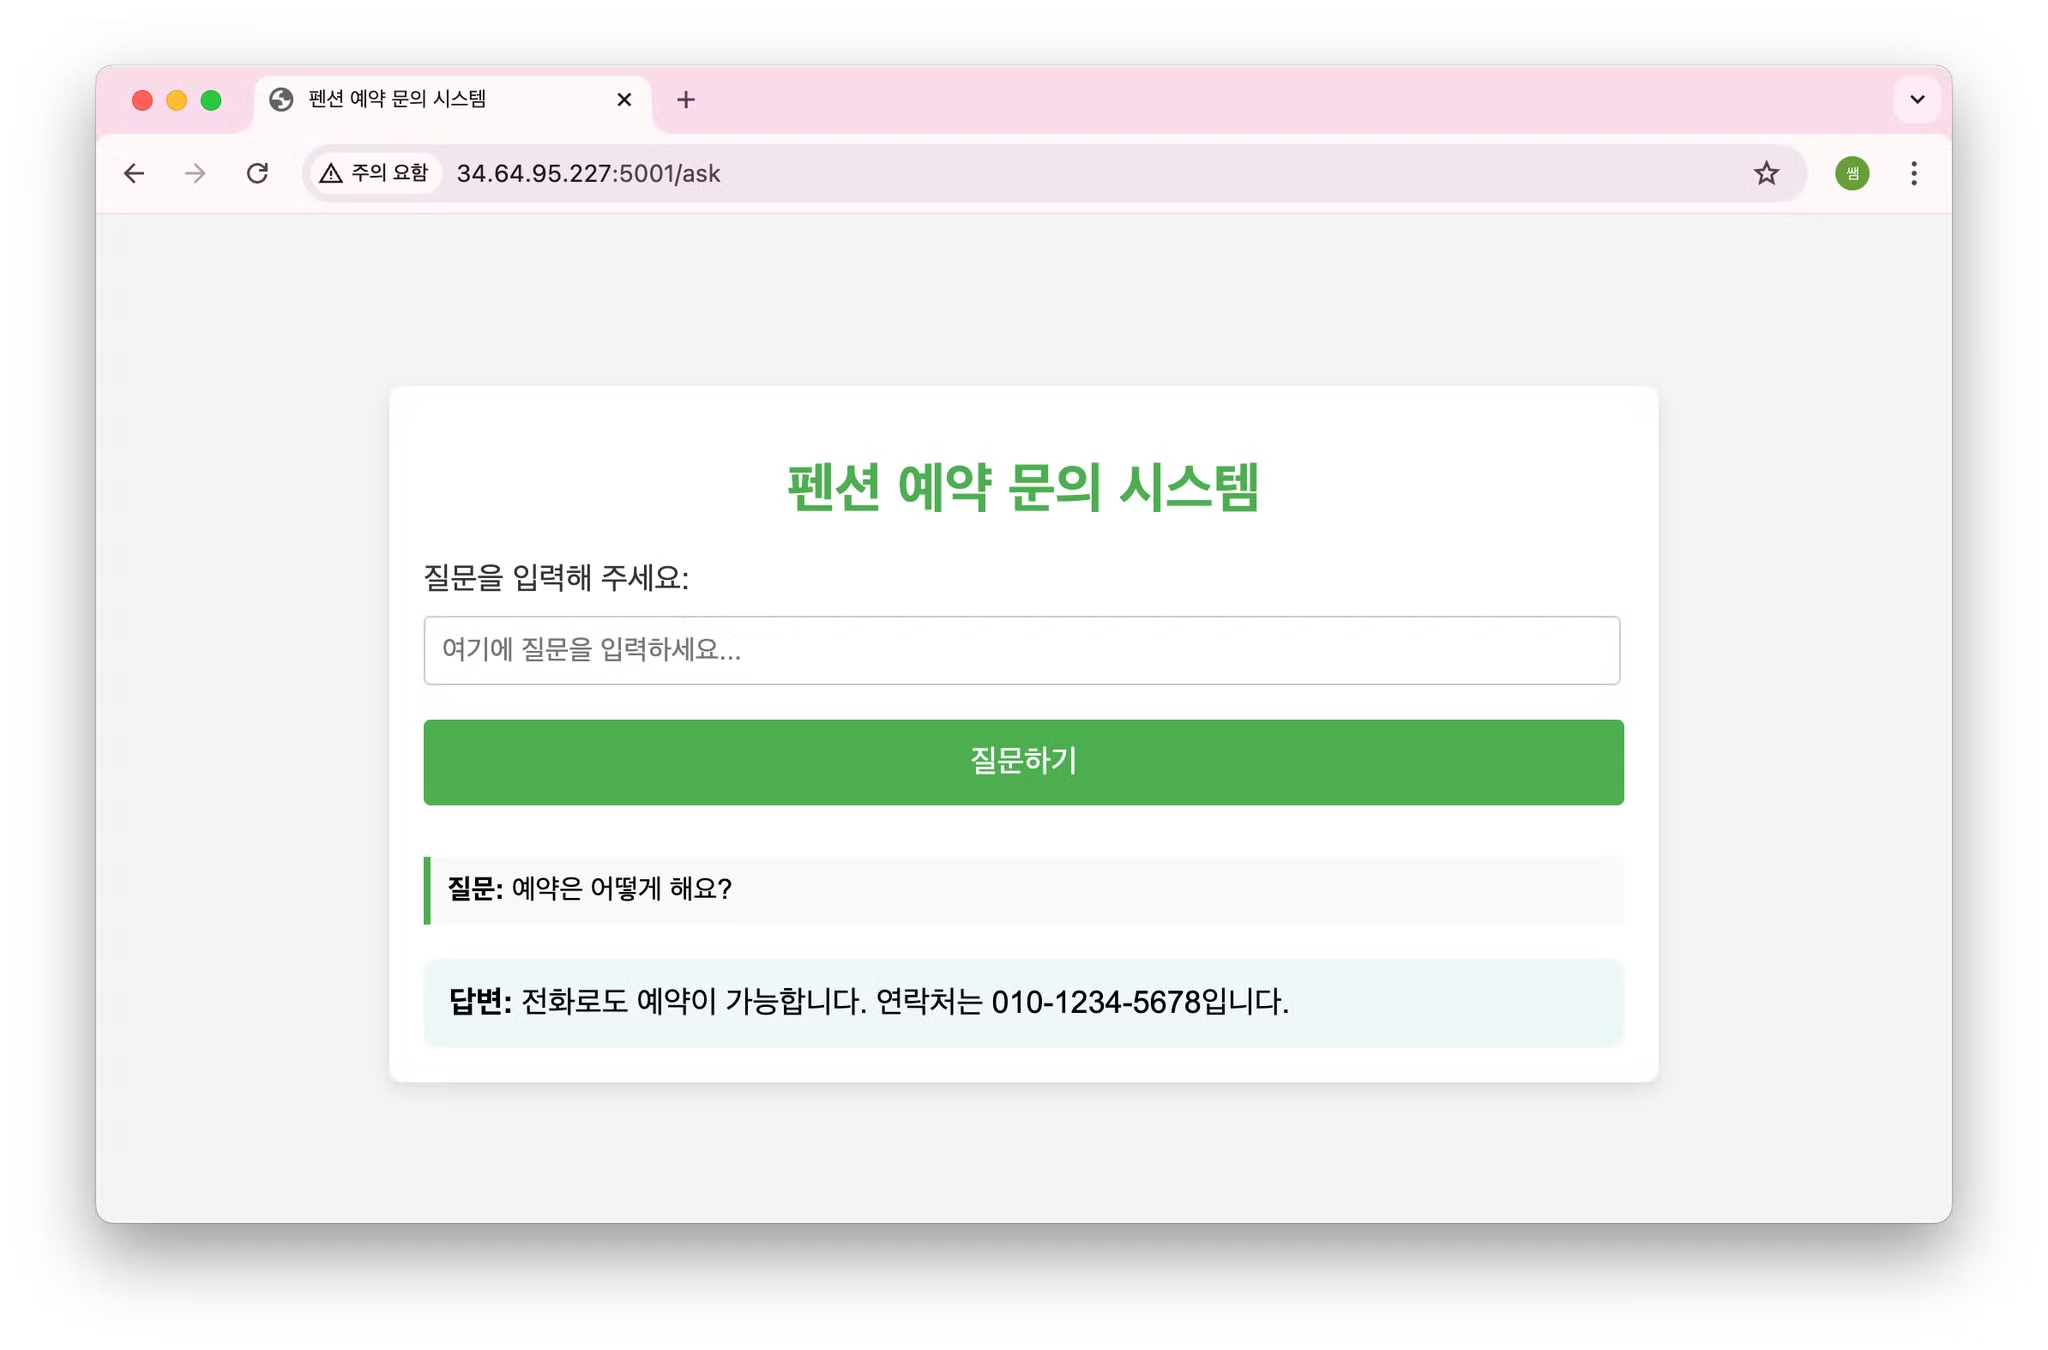

디렉토리 구조

In [ ]:
QnA_system/
├── app.py
├── templates/
│   └── index.html
├── static/
│   ├── css/
│   ├── js/
│   └── images/
└── requirements.txt

requirement.txt 내용

In [ ]:
Flask
konlpy
gensim
scikit-learn

Dependancy 설치를 위한 명령

In [ ]:
pip install -r requirements.txt

1. app.py (Flask 서버 코드)

In [ ]:
from flask import Flask, render_template, request
import re
from konlpy.tag import Okt  # Open Korean Text 형태소 분석기
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Flask 앱 생성
app = Flask(__name__)

# 한국어 형태소 분석기 초기화
okt = Okt()

# 펜션 예약 관련 미리 정의된 답변 목록
answers = [
    "예약은 홈페이지에서 가능합니다. 날짜를 선택하고 결제를 진행해 주세요.",
    "전화로도 예약이 가능합니다. 연락처는 010-1234-5678입니다.",
    "취소는 예약일 기준 3일 전까지 가능합니다. 그 이후에는 취소 수수료가 발생합니다.",
    "체크인은 오후 3시부터 가능합니다. 체크아웃은 오전 11시입니다.",
    "애완동물 동반은 가능합니다. 다만 추가 요금이 발생할 수 있습니다.",
    "바베큐 시설은 추가 요금을 내고 이용할 수 있습니다. 예약 시 옵션을 선택해 주세요.",
    "추가 인원 요금은 1인당 10,000원이 부과됩니다.",
    "무료 주차 공간이 마련되어 있습니다.",
    "예약 변경은 예약일 7일 전까지 가능합니다."
]

# 불용어 정의
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

# 전처리 함수 정의
def preprocess_text(text):
    text = re.sub(r'[^가-힣\\s]', '', text)  # 한글과 공백만 남기기
    tokens = okt.morphs(text)  # 형태소 분석
    tokens = [word for word in tokens if word not in stopwords]  # 불용어 제거
    return tokens

# 답변에 대해 전처리 수행
processed_answers = [preprocess_text(answer) for answer in answers]

# Word2Vec 모델 학습
word2vec_model = Word2Vec(sentences=processed_answers, vector_size=100, window=5, min_count=1, sg=0)

# 문장 벡터 계산
def get_sentence_vector(sentence_tokens, model):
    vectors = [model.wv[word] for word in sentence_tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 질문에 대한 가장 유사한 답변 찾기
def find_most_similar_answer(question, threshold=0.3):
    processed_question = preprocess_text(question)
    question_vector = get_sentence_vector(processed_question, word2vec_model)
    answer_vectors = np.array([get_sentence_vector(answer, word2vec_model) for answer in processed_answers])
    cosine_similarities = cosine_similarity([question_vector], answer_vectors)
    most_similar_idx = np.argmax(cosine_similarities)
    highest_similarity = cosine_similarities[0][most_similar_idx]

    if highest_similarity < threshold:
        return f"적절한 답변을 찾을 수 없습니다. (유사도: {highest_similarity:.2f})"
    else:
        return answers[most_similar_idx]

# 기본 페이지
@app.route('/')
def index():
    return render_template('index.html')

# 질문 처리
@app.route('/ask', methods=['POST'])
def ask():
    user_question = request.form['question']
    answer = find_most_similar_answer(user_question)
    return render_template('index.html', question=user_question, answer=answer)

# Flask 실행
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5001, debug=True)